### Thien Win, PE

### Project: Recommend a KDrama!

<b>Contact:</b> win.thien@gmail.com <br>
<b>LinkedIn:</b> https://www.linkedin.com/in/thien-win-pe/<br>
<b>GitHub:</b> https://github.com/win-thien<br>

<hr>

### Introduction

In this short project, I will demonstrate some data cleaning and NLP techniques to create a simple content filter based recommender system for korean dramas. I am a big fan of KDramas and with the explosion of Korean culture in the West and other parts of the world, more music, shows and movies are being recognized by streaming platforms. Netflix launched its services in Korea on 2016 and released its first Korean content in 2018 with a 24-episode historical drama in "Mr. Sunshine". With a sudden surge of 4.1M subscribers in 2020, Netflix raced to produce more content with 15 original Korean series/films produced in 2021 and 25 scheduled for 2022.

With so much new content and sometimes long time investments, I am looking to build a recommender system to help make my choices easier.

The dataset used was found on Kaggle and looks to be scraped from iMDb, which is a database for films and shows that provide certain information like plots, actors/actresses, runtime, etc.

https://www.kaggle.com/datasets/chanoncharuchinda/imdb-korean-tv-series <br>
https://asiasociety.org/korea/korean-dramas-taking-over-netflix

I saw during a cursory review of the dataset that there are observations in the set that are not Korean dramas. I left them in there to see if the recommender system can detect similarities in the movie input and provide other fitting recommendations regardless of language.

In [1]:
#import required libraries and modules
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Load in dataset

Let's first start with loading in and inspecting some of the feature variables in the 'koreanTV.csv' file that contains the the plot, stars, genre, etc. of the dramas utilizing Pandas.

In [2]:
drama = pd.read_csv('koreanTV.csv')
print('Number of observations:',drama['Title'].count())
drama.head()

Number of observations: 1989


,Title,Year,Rating,Votes:,Time,Genre,Stars,Short Story
0,Hellbound,(2021– ),6.7,"14,032",150 min,"Crime, Drama, Fantasy","Yoo Ah-in, Kim Hyun-joo, Jeong Min Park, Jin-a...",\nPeople hear predictions on when they will di...
1,Squid Game,(2021– ),8.1,"339,931",55 min,"Action, Drama, Mystery","Lee Jung-jae, Park Hae-soo, Wi Ha-Joon, Jung H...",\nHundreds of cash-strapped players accept a s...
2,My Name,(2021– ),7.9,"12,877",50 min,"Action, Crime, Drama","Hee-soon Park, Ahn Bo-Hyun, Han So-hee, Kim Sa...",\nThe story about a woman who joins an organiz...
3,Miraculous: Tales of Ladybug & Cat Noir,(2015– ),7.7,"9,439",20 min,"Animation, Action, Adventure","Cristina Valenzuela, Bryce Papenbrook, Keith S...","\nMarinette and Adrien, two normal teens, tran..."
4,Happiness,(2021– ),8.6,921,-,"Action, Fantasy, Thriller","Han Hyo-joo, Park Hyung-Sik, Woo-jin Jo, Lee J...",\nAn apocalyptic thriller that takes place in ...


From the imported dataset, there are 1,989 observations in total. Let's check some of the high level statistical characteristics and data types for the information found in the dataframe.

In [3]:
drama.describe()

,Title,Year,Rating,Votes:,Time,Genre,Stars,Short Story
count,1989,1978,1989,1989,1989,1989,1989,1989
unique,1975,173,62,659,79,224,1445,1662
top,Happy Together,(2021– ),-,-,-,Drama,-,\nAdd a Plot\n
freq,3,96,504,504,921,303,542,327


In [4]:
drama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1989 non-null   object
 1   Year         1978 non-null   object
 2   Rating       1989 non-null   object
 3   Votes:       1989 non-null   object
 4   Time         1989 non-null   object
 5   Genre        1989 non-null   object
 6   Stars        1989 non-null   object
 7   Short Story  1989 non-null   object
dtypes: object(8)
memory usage: 124.4+ KB


From the summaries above, there are some Null values as noted by the `Year` count not totaling 1,989. In addition, `Rating`, `Votes` and `Time` are expected to be numerical types but is currently an object type. This will be resolved in the next step of data cleanup.

<hr>

### Data Cleanup

For the first step in the data cleanup, the Null values as identified in the previous step will be evaluated. We start by observing these Null values in the observations as follows: 

In [5]:
drama.loc[drama['Year'].isnull()]

,Title,Year,Rating,Votes:,Time,Genre,Stars,Short Story
497,Suriname,NaN,-,-,-,"Biography, Crime, Drama",-,\nBased on the true story of a Korean man who ...
569,The Sound of Magic,NaN,-,-,-,Drama,-,"\nWhen she was little, Yun Ai dreamed of becom..."
1152,American Seoul,NaN,-,-,-,Drama,-,\nFollows a young Korean-American adoptee who ...
1375,Criminal Justice,NaN,-,-,-,"Crime, Drama",-,\nKorean adaptation of BBC Studios' crime seri...
1484,Remarriage & Desires,NaN,-,-,-,Drama,-,\nSet at the exclusive matchmaking agency Rex ...
1495,Queen of the Scene,NaN,-,-,-,Drama,-,\nQueen of the Scene tells the story of a Kore...
1660,Four Men,NaN,-,-,-,"Mystery, Romance",-,\nAdd a Plot\n
1663,Power Panda Posse,NaN,-,-,-,Animation,-,\nAdd a Plot\n
1888,What AM I made of?,NaN,-,-,-,"Documentary, Biography",-,\nWhat if we tell you that all the necessary c...
1926,Close to the Flame,NaN,-,-,-,"Action, Thriller",-,\nAdd a Plot\n


It could be easy enough for us to identify the year in which these dramas came out, but for this exercise, we will remove these observations instead of imputing them. More interestingly though, there are also no values inputted for `Rating`, `Votes`, `Time`, `Stars` and some are missing story plots. Pandas is recognizing the '-' and '/nAdd a Plot/n' as values (which makes sense given the object data type).

For this project, `Year` and `Time` has no bearing to the end product of my Recommender System so will be removed in its entirety. I want to create a new column, `bagofwords`, that contains the `Genre`, `Stars`, and `Short Story` tokens. We will start by removing the `Year` and `Time` column and than set about looking at missing data in the relevant columns. 

In [6]:
drama = drama.drop(columns=['Year','Time'])
drama.head()

,Title,Rating,Votes:,Genre,Stars,Short Story
0,Hellbound,6.7,"14,032","Crime, Drama, Fantasy","Yoo Ah-in, Kim Hyun-joo, Jeong Min Park, Jin-a...",\nPeople hear predictions on when they will di...
1,Squid Game,8.1,"339,931","Action, Drama, Mystery","Lee Jung-jae, Park Hae-soo, Wi Ha-Joon, Jung H...",\nHundreds of cash-strapped players accept a s...
2,My Name,7.9,"12,877","Action, Crime, Drama","Hee-soon Park, Ahn Bo-Hyun, Han So-hee, Kim Sa...",\nThe story about a woman who joins an organiz...
3,Miraculous: Tales of Ladybug & Cat Noir,7.7,"9,439","Animation, Action, Adventure","Cristina Valenzuela, Bryce Papenbrook, Keith S...","\nMarinette and Adrien, two normal teens, tran..."
4,Happiness,8.6,921,"Action, Fantasy, Thriller","Han Hyo-joo, Park Hyung-Sik, Woo-jin Jo, Lee J...",\nAn apocalyptic thriller that takes place in ...


Now, let's take a look where the plot is missing in the dataset.

In [7]:
#missing short story
print("Missing Plots:",drama['Short Story'][drama['Short Story']=='\nAdd a Plot\n'].count())

Missing Plots: 327


There are 327 observations with missing plots for the dramas. This is a critical component of the `bagofwords` column we want to create. Though we could Google the plots for these dramas, I have chosen to remove these observations from the dataframe. 

In [8]:
#assign to new dataframe should we decide to go back and impute these later
drama2 = drama.loc[drama['Short Story']!='\nAdd a Plot\n']

#sanity check
drama2.head()
print('Number of observations:',drama2['Title'].count())

Number of observations: 1662


Looks like the changes took hold. In addition, we see that the `Short Story` description starts with a '\n'. We will want remove this, make all words lowercase and punctuations like ',' and '.' from the column as follows: 

In [9]:
drama2['Short Story'] = drama2["Short Story"].str.replace("\n", "")
drama2['Short Story'] = drama2['Short Story'].str.replace('.','')
drama2['Short Story'] = drama2['Short Story'].str.replace(',','')
drama2['Short Story'] = drama2['Short Story'].str.lower()

#sanity check
drama2['Short Story'].head()

0    people hear predictions on when they will die ...
1    hundreds of cash-strapped players accept a str...
2    the story about a woman who joins an organized...
3    marinette and adrien two normal teens transfor...
4    an apocalyptic thriller that takes place in a ...
Name: Short Story, dtype: object

Now that we've cleaned up the `Short Story` description to our liking, I want to tokenize the words into a new column `plot_token` and remove the original column as follows:

In [10]:
drama2['plot_token'] = drama2['Short Story'].str.split(' ')
drama2.drop(columns='Short Story', inplace=True)

drama2.head()

,Title,Rating,Votes:,Genre,Stars,plot_token
0,Hellbound,6.7,"14,032","Crime, Drama, Fantasy","Yoo Ah-in, Kim Hyun-joo, Jeong Min Park, Jin-a...","[people, hear, predictions, on, when, they, wi..."
1,Squid Game,8.1,"339,931","Action, Drama, Mystery","Lee Jung-jae, Park Hae-soo, Wi Ha-Joon, Jung H...","[hundreds, of, cash-strapped, players, accept,..."
2,My Name,7.9,"12,877","Action, Crime, Drama","Hee-soon Park, Ahn Bo-Hyun, Han So-hee, Kim Sa...","[the, story, about, a, woman, who, joins, an, ..."
3,Miraculous: Tales of Ladybug & Cat Noir,7.7,"9,439","Animation, Action, Adventure","Cristina Valenzuela, Bryce Papenbrook, Keith S...","[marinette, and, adrien, two, normal, teens, t..."
4,Happiness,8.6,921,"Action, Fantasy, Thriller","Han Hyo-joo, Park Hyung-Sik, Woo-jin Jo, Lee J...","[an, apocalyptic, thriller, that, takes, place..."


Similar to what was done for the `Short Story` column, we want to clean and tokenize the `Stars` and `Genre` columns. We first need to identify if there are any missing entries for the observations as follows: 

In [11]:
#missing genre's
print("Missing Genre:",drama2['Genre'][drama2['Genre']=='-'].count())
#missing stars
print("Missing Stars:",drama2['Stars'][drama2['Stars']=='-'].count())

Missing Genre: 69
Missing Stars: 347


As before, we will remove these observations from the set even though we could probably impute them with a Google search. Instead of removing the observations, we will remove the '-' and instead leave it empty. The majority of `bagofwords` column to be created should come from the plot anyways. 

In [12]:
#remove '-' and lowercase Genre
drama2['Genre'] = drama2["Genre"].str.replace("-", "")
drama2['Genre'] = drama2['Genre'].str.replace(',','')
drama2['Genre'] = drama2['Genre'].str.lower()

#tokenize and remove original column
drama2['genre_token'] = drama2['Genre'].str.split(' ')
drama2.drop(columns='Genre', inplace=True)

drama2.head()

,Title,Rating,Votes:,Stars,plot_token,genre_token
0,Hellbound,6.7,"14,032","Yoo Ah-in, Kim Hyun-joo, Jeong Min Park, Jin-a...","[people, hear, predictions, on, when, they, wi...","[crime, drama, fantasy]"
1,Squid Game,8.1,"339,931","Lee Jung-jae, Park Hae-soo, Wi Ha-Joon, Jung H...","[hundreds, of, cash-strapped, players, accept,...","[action, drama, mystery]"
2,My Name,7.9,"12,877","Hee-soon Park, Ahn Bo-Hyun, Han So-hee, Kim Sa...","[the, story, about, a, woman, who, joins, an, ...","[action, crime, drama]"
3,Miraculous: Tales of Ladybug & Cat Noir,7.7,"9,439","Cristina Valenzuela, Bryce Papenbrook, Keith S...","[marinette, and, adrien, two, normal, teens, t...","[animation, action, adventure]"
4,Happiness,8.6,921,"Han Hyo-joo, Park Hyung-Sik, Woo-jin Jo, Lee J...","[an, apocalyptic, thriller, that, takes, place...","[action, fantasy, thriller]"


In [13]:
#remove '-', ',' and lowercase Stars
drama2['Stars'] = drama2["Stars"].str.replace("-", "")
drama2['Stars'] = drama2["Stars"].str.replace(" ", "")
drama2['Stars'] = drama2['Stars'].str.lower()

#tokenize and remove original column
drama2['stars_token'] = drama2['Stars'].str.split(',')
drama2.drop(columns='Stars', inplace=True)

drama2.head()

,Title,Rating,Votes:,plot_token,genre_token,stars_token
0,Hellbound,6.7,"14,032","[people, hear, predictions, on, when, they, wi...","[crime, drama, fantasy]","[yooahin, kimhyunjoo, jeongminpark, jinahwon]"
1,Squid Game,8.1,"339,931","[hundreds, of, cash-strapped, players, accept,...","[action, drama, mystery]","[leejungjae, parkhaesoo, wihajoon, junghoyeon]"
2,My Name,7.9,"12,877","[the, story, about, a, woman, who, joins, an, ...","[action, crime, drama]","[heesoonpark, ahnbohyun, hansohee, kimsangho]"
3,Miraculous: Tales of Ladybug & Cat Noir,7.7,"9,439","[marinette, and, adrien, two, normal, teens, t...","[animation, action, adventure]","[cristinavalenzuela, brycepapenbrook, keithsil..."
4,Happiness,8.6,921,"[an, apocalyptic, thriller, that, takes, place...","[action, fantasy, thriller]","[hanhyojoo, parkhyungsik, woojinjo, leejoonhyuk]"


Now that the columns have been tokenized, we can proceed to create our `bagofwords` column and droppping the individual columns as follows:

In [14]:
#creating new bagofwords column
drama2['bagofwords'] = ''
columns = ['plot_token','genre_token','stars_token'] 

for index, row in drama2.iterrows():
    words = ''
    for col in columns:
        words += ' '.join(row[col]) + ' '
    row['bagofwords'] = words
    
drama2 = drama2.drop(columns=['plot_token','genre_token','stars_token'], axis=1)
    
drama2.head()

,Title,Rating,Votes:,bagofwords
0,Hellbound,6.7,"14,032",people hear predictions on when they will die ...
1,Squid Game,8.1,"339,931",hundreds of cash-strapped players accept a str...
2,My Name,7.9,"12,877",the story about a woman who joins an organized...
3,Miraculous: Tales of Ladybug & Cat Noir,7.7,"9,439",marinette and adrien two normal teens transfor...
4,Happiness,8.6,921,an apocalyptic thriller that takes place in a ...


With the `bagofwords` created, our attention will be focused on the `Rating` and `Votes:`. First thing is to change the column name and remove the ':' at the end of the `Votes:`.

In [15]:
drama2.rename(columns={"Votes:": "Votes"}, inplace=True)
drama2.head()

,Title,Rating,Votes,bagofwords
0,Hellbound,6.7,"14,032",people hear predictions on when they will die ...
1,Squid Game,8.1,"339,931",hundreds of cash-strapped players accept a str...
2,My Name,7.9,"12,877",the story about a woman who joins an organized...
3,Miraculous: Tales of Ladybug & Cat Noir,7.7,"9,439",marinette and adrien two normal teens transfor...
4,Happiness,8.6,921,an apocalyptic thriller that takes place in a ...


Let's see how many missing values we have for `Rating` and `Votes`.

In [16]:
#missing rating
print("Missing Rating:",drama2['Rating'][drama2['Rating']=='-'].count())
#missing votes
print("Missing Votes:",drama2['Votes'][drama2['Votes']=='-'].count())

Missing Rating: 312
Missing Votes: 312


There are 312 missing values for `Rating` and `Votes`. It is my suspicion that these missing values are likely to be at the same observations. For the purpose of a recommender system, we will not be needing these columns but still want to understand some basic statistical distribution from this information. We will create two dataframes from this where one will be used for the recommender system and one for simple EDA.

In [17]:
#creating EDA dataframe
drama_EDA = drama2[drama2['Rating'] != '-']

#creating recommender dataframe
drama_rec = drama2.drop(columns = ['Rating', 'Votes'])

drama_EDA.head()

,Title,Rating,Votes,bagofwords
0,Hellbound,6.7,"14,032",people hear predictions on when they will die ...
1,Squid Game,8.1,"339,931",hundreds of cash-strapped players accept a str...
2,My Name,7.9,"12,877",the story about a woman who joins an organized...
3,Miraculous: Tales of Ladybug & Cat Noir,7.7,"9,439",marinette and adrien two normal teens transfor...
4,Happiness,8.6,921,an apocalyptic thriller that takes place in a ...


In [18]:
drama_rec.head()

,Title,bagofwords
0,Hellbound,people hear predictions on when they will die ...
1,Squid Game,hundreds of cash-strapped players accept a str...
2,My Name,the story about a woman who joins an organized...
3,Miraculous: Tales of Ladybug & Cat Noir,marinette and adrien two normal teens transfor...
4,Happiness,an apocalyptic thriller that takes place in a ...


We will be working with the drama_EDA dataframe first for simple exploratory data analysis. As mentioned before, we need to convert the `Rating` and `Votes` to be numeric type. Because `Votes` is currently a string, we need to remove any ',' found in the string first before casting is as a integer. `Rating` will be cast as a float.

In [19]:
#remove ',' and convert
drama_EDA['Votes'] = drama_EDA['Votes'].str.replace(',','')
drama_EDA['Votes'] = drama_EDA['Votes'].astype('int')

drama_EDA['Rating'] = drama_EDA['Rating'].astype('float')

drama_EDA.dtypes

Title          object
Rating        float64
Votes           int32
bagofwords     object
dtype: object

With the EDA dataframe cleaned up, we can now perform some analysis on the distribution. 

<hr>

### EDA

Let's visualize the `Rating` and `Votes` distribution.

In [20]:
#creat a function for plotting different numeric columns
def hist_num(column):
    plt.figure()
    plt.hist(drama_EDA[column], bins=20)
    plt.title(f'Histogram of {column} Distribution')
    plt.axvline(drama_EDA[column].mean(),label='mean', color='red')
    plt.axvline(drama_EDA[column].median(),label='median', color='blue')
    plt.xlabel(column)
    plt.legend()
    plt.show()
    
    print(f'{column} Mean:',round(drama_EDA[column].mean(),2))
    print(f'{column} Median:',drama_EDA[column].median())
    print(f'{column} Minimum:',drama_EDA[column].min())
    print(f'{column} Maximum:',drama_EDA[column].max())

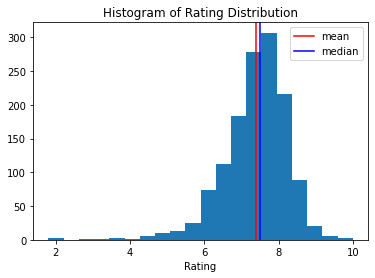

Rating Mean: 7.39
Rating Median: 7.5
Rating Minimum: 1.8
Rating Maximum: 10.0


In [21]:
hist_num('Rating')

We can see from the distribution that the majority of dramas have a rating above 7.5.

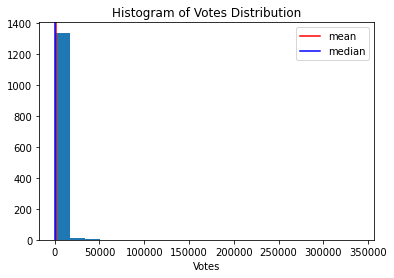

Votes Mean: 1242.05
Votes Median: 111.0
Votes Minimum: 5
Votes Maximum: 339931


In [22]:
hist_num('Votes')

From the distribution of votes, the large majority of dramas have less than 25,000 votes. Let's dive deeper and see that lowest and highest voted and rated drama. 

In [23]:
#create function to quickly plot top and bottom dramas
def top_bottom(column, top=True):
    sorted_df = drama_EDA.sort_values(by=column).head(20)
    plt.figure(figsize=(15,8))
    if top==True:
        sorted_df = drama_EDA.sort_values(by=column, ascending=False).head(20)
        plt.barh(sorted_df['Title'], sorted_df[column])
        plt.title(f'Top Drama {column}')
    else:
        sorted_df = drama_EDA.sort_values(by=column, ascending=False).tail(20)
        plt.barh(sorted_df['Title'], sorted_df[column], color='red')
        plt.title(f'Bottom Drama {column}')
    plt.xlabel(column)
    plt.ylabel('Drama')

    plt.show()

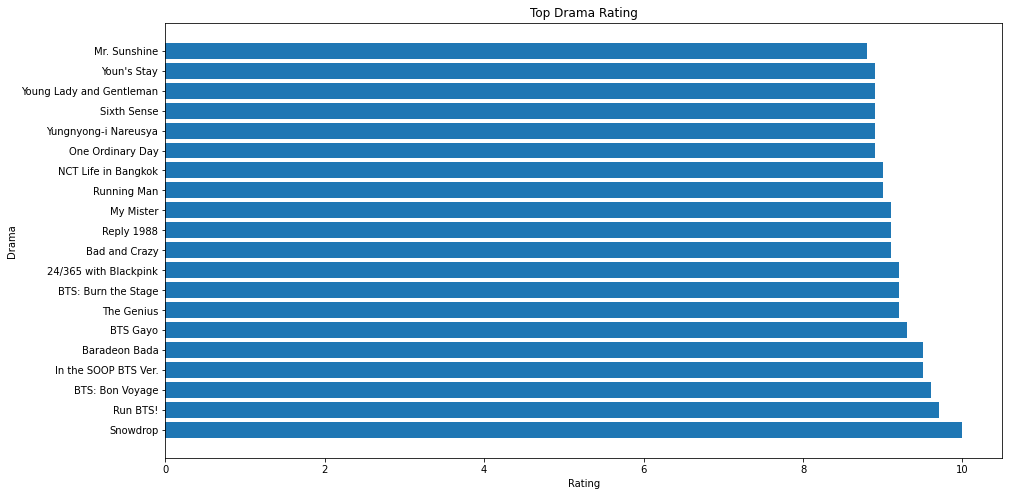

In [24]:
top_bottom('Rating', top=True)

Snowdrop has a perfect rating. I will need to check it out. In addition, we can see that BTS comes up several times in the top drama list as well as my favorite show, Running Man.

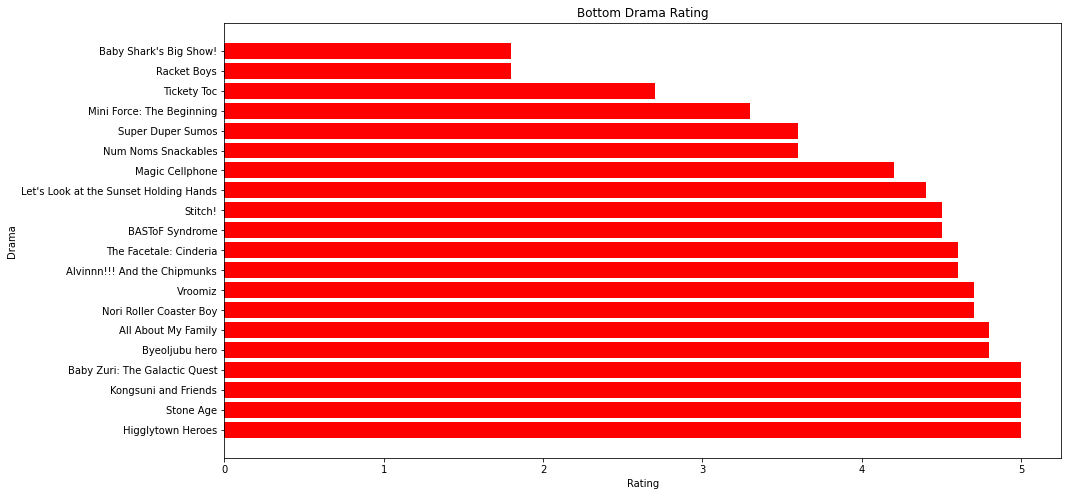

In [25]:
top_bottom('Rating', top=False)

The above shows the lowest rated dramas. I cannot say I've watched any of them. Let's take a look at the highest and lowest voted dramas.

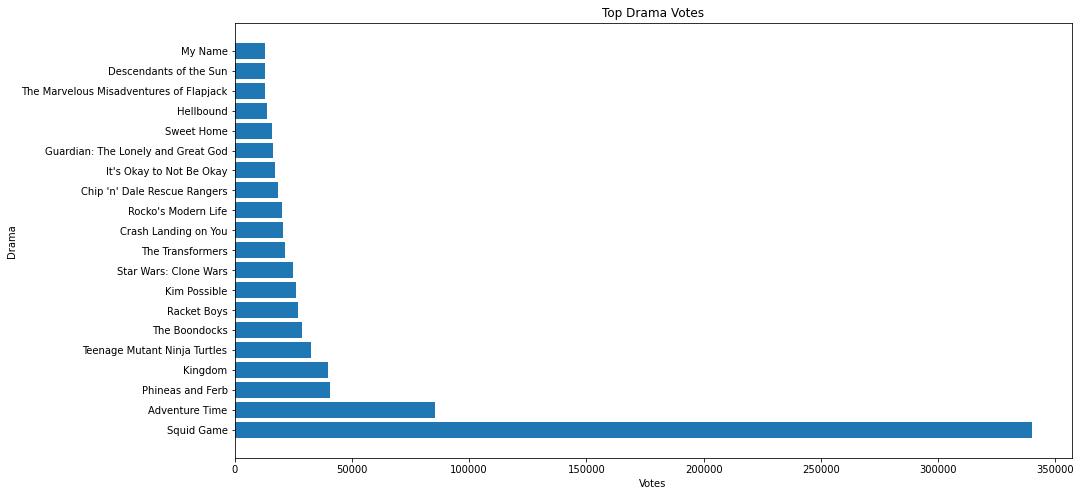

In [26]:
top_bottom('Votes', top=True)

As mentioned before, the dataset contains non-Korean shows in the list and can be seen here. Squid Game (great show!) has the most votes by a large margin.

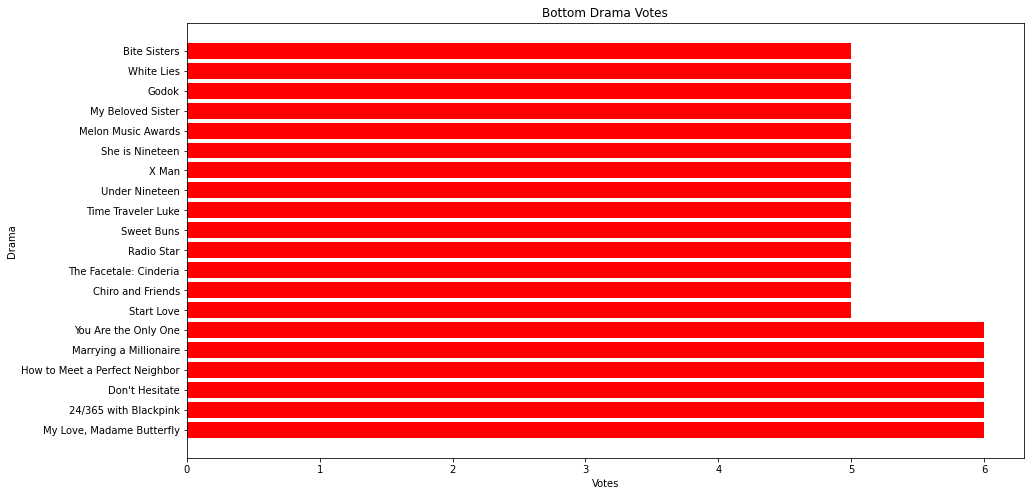

In [27]:
top_bottom('Votes', top=False)

Now that the top and bottom dramas have been discovered in terms of rating and votes, let's get to writing our recommender system.

<hr>

### Recommender System

For the Recommender System, we will build a content-based one based on similar movies the user has viewed already based on cosine similarities.

In [28]:
#import sklearn libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
#reminder for the dataframe we are working with
drama_rec.head()

,Title,bagofwords
0,Hellbound,people hear predictions on when they will die ...
1,Squid Game,hundreds of cash-strapped players accept a str...
2,My Name,the story about a woman who joins an organized...
3,Miraculous: Tales of Ladybug & Cat Noir,marinette and adrien two normal teens transfor...
4,Happiness,an apocalyptic thriller that takes place in a ...


We will start by building a model with the CountVectorizer module from SKLearn and take a look at the cosine similarities. For additional information on cosine similarity, I found this article very helpful.

https://www.machinelearningplus.com/nlp/cosine-similarity/

In [30]:
#use stop words to remove common english words like 'the', 'is' etc.
rec_model = CountVectorizer(stop_words="english")
rec_model = rec_model.fit_transform(drama_rec['bagofwords'])
cosinesim = cosine_similarity(rec_model, rec_model)
print(cosinesim)

[[1.         0.04159452 0.20228869 ... 0.04950738 0.         0.05564149]
 [0.04159452 1.         0.07151985 ... 0.035007   0.         0.        ]
 [0.20228869 0.07151985 1.         ... 0.04256283 0.         0.04783649]
 ...
 [0.04950738 0.035007   0.04256283 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.05564149 0.         0.04783649 ... 0.         0.         1.        ]]


From the above, we now have the cosine similarities for all the titles in our dataframe. We will create a index of the titles as follows:

In [31]:
titles = pd.Series(drama_rec['Title'])
titles

0                                     Hellbound
1                                    Squid Game
2                                       My Name
3       Miraculous: Tales of Ladybug & Cat Noir
4                                     Happiness
                         ...                   
1978         Crime and Film Noir Drama Specials
1980                    Double Trouble En Corea
1982                Why Couldnt You Get Married
1984      Untitled K-Pop Latin American Project
1985                               Bite Sisters
Name: Title, Length: 1662, dtype: object

To complete, we will create a recommender function that take a title that the user has seen and recommend 10 movies with the highest cosine similarity to that movie.

In [32]:
#create a list for assertion
drama_title = []
for i in titles.values:
    drama_title.append(i)

In [43]:
#define recommender function
def recommend(title, cosinesim = cosinesim):
    '''
    Function takes a user inputted title that is found in the list and returns a list of 10 titles with the largest cosine
    similarity.
    
    #Assert that the inputted title is in the list of titles in the dataset
    
    '''
    assert title in drama_title, "Inputted title needs to be part of database"
    
    #instantiate empty list to be populated 
    recommended_movies = []
    idx = drama_rec[drama_rec['Title']==title].index[0]
    score_series = pd.Series(cosinesim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_movies.append(list(drama_rec['Title'])[i])
        
    return recommended_movies

We will now test out the recommender system by inputting 'Running Man' to see what titles are recommended based on this user input.

In [44]:
recommend('Running Man')

['Prison Life of Fools',
 'Family Outing',
 'Busted!',
 'We Play',
 'Knowing Bros',
 'Running Girls',
 'Sixth Sense',
 'X Man',
 '4 Wheeled Restaurant',
 'Crazy Recipe Adventure']

From the recommended list, 'Family Outing', 'Busted!', 'X Man' and '4 Wheeled Restaurant' are shows I am familiar with and can say that they are similar to 'Running Man'. This is great!

Let's now test where we input a title not in the list to make sure the assertion error comes up.

In [534]:
recommend('X-files')

AssertionError: Inputted title needs to be part of database

Everything seems to be working. While testing the recommender function, I sometimes spelled the title wrong or only remembered part of the title. To this point, let's create a function that users can use to find titles found in the database. 

In [557]:
def title_finder(keyword):
    return drama_rec[drama_rec['Title'].str.contains('Hometown')]['Title']

In [558]:
title_finder('Hometown')

7      Hometown Cha-Cha-Cha
226                Hometown
Name: Title, dtype: object

Now the user can find the exact title in the database for use.

### Conclusion

In this notebook, I have created a simple recommender system for Korean Dramas. I have cleaned the data so that it is formatted in a workable way.

As some next steps, would want to create a function for users to type in keywords of plot line or by actor/actress. This could also be applied to other datasets for a recommender system or deployed on the web as a tool for those looking for recommendations. 

Happy Watching!